<a href="https://colab.research.google.com/github/MariaESCabral/NF_Topicos_Big_Data_Phyton/blob/main/PRIMEIRA_ETAPA_NF_ARA0168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

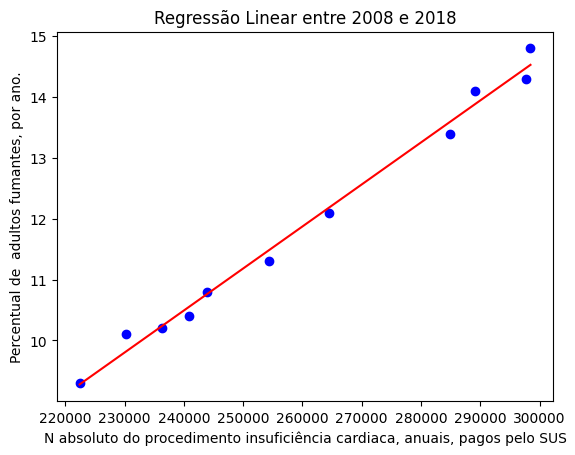



Coeficiente Angular (inclinação): 6.904176887903324e-05
Intercepto (coeficiente linear): -6.077148494614873


In [1]:
# Primeira etapa do trabalho de conclusão de disciplina apresentado na disciplina de Tópicos de Big Data em Python.
# Tema: Análise da relação entre o consumo de tabaco e a taxa de mortalidade na população brasileira - Utilização de regressão linear.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Importando os Dados
# Utilizei o número absoluto de procedimentos anuais pagos pelo SUS para deduzir o número de casos de problema cardiovascular no ano.
tb_insufcardiaca = pd.read_csv('https://raw.githubusercontent.com/MariaESCabral/NF_Topicos_Big_Data_Phyton/main/Tabela%201-7%20%E2%80%93%20N%C3%BAmero%20absoluto%20e%20taxas%20de%20procedimentos%20anuais%20pagos%20pelo%20SUS%2C%20de%202008%20a%202018%2C%20por%20grupo.csv', sep=';')
tb_percfumantes= pd.read_csv('https://raw.githubusercontent.com/MariaESCabral/NF_Topicos_Big_Data_Phyton/main/VIGITEL%20BRASIL%202006-2020%20-%20TABAGISMO%20E%20CONSUMO%20ABUSIVO%20DE%20%C3%81LCOOL%2022.csv', sep=';')

df = tb_insufcardiaca.merge(tb_percfumantes, on='Ano', how='inner') # com o inner os anos que dão NaN já são descartados

# Removendo os pontos das tabelas
df['Total_x'] = df['Total_x'].str.replace(',', '').astype(float) # valor absoluto
df['Total_y'] = df['Total_y'].str.replace(',', '.').astype(float) # porcentagem

# Atribuindo oq irei ultilizar de X e Y
x = df[['Total_x']]
y = df['Total_y']

model = LinearRegression()
model.fit(x, y)

coeficiente_angular = model.coef_[0]
intercepto = model.intercept_

previsoes = model.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, previsoes, color='red')
plt.xlabel('N absoluto do procedimento insuficiência cardiaca, anuais, pagos pelo SUS')
plt.ylabel('Percentual de  adultos fumantes, por ano.')
plt.title('Regressão Linear entre 2008 e 2018')
plt.show()

print(f"\n")
print(f"Coeficiente Angular (inclinação): {coeficiente_angular}")
print(f"Intercepto (coeficiente linear): {intercepto}")